In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure

(1797L, 64L)


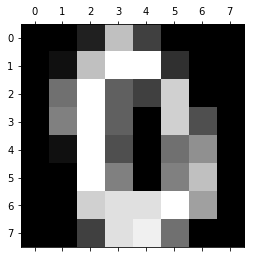

In [29]:
digits = load_digits()
print digits.data.shape

 
plt.gray() 
plt.matshow(digits.images[150]) 
plt.show() 

In [11]:
digits.data
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(digits.data), digits.target, test_size=0.25, random_state=42)

# take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

# Checking sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

In [14]:
kVals = range(1, 30, 2)
accuracies = []

# loop over kVals
for k in xrange(1, 30, 2):
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and print the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# largest accuracy
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%
k=1 achieved highest accuracy of 99.26% on validation data


In [15]:
# Now that I know the best value of k, re-train the classifier
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)

# Predict labels for the test set
predictions = model.predict(testData)

# Evaluate performance of model for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.95      1.00      0.97        37
          2       1.00      1.00      1.00        38
          3       0.98      0.98      0.98        46
          4       0.98      0.98      0.98        55
          5       0.98      1.00      0.99        59
          6       1.00      1.00      1.00        45
          7       1.00      0.98      0.99        41
          8       0.97      0.95      0.96        38
          9       0.96      0.94      0.95        48

avg / total       0.98      0.98      0.98       450



array([[  0.,   0.,   0., ...,  14.,   5.,   0.],
       [  0.,   0.,  11., ...,   1.,   0.,   0.],
       [  0.,   0.,   8., ...,   8.,   0.,   0.],
       ..., 
       [  0.,   1.,  13., ...,  12.,   5.,   0.],
       [  0.,   0.,   0., ...,   5.,   0.,   0.],
       [  0.,   6.,  16., ...,   0.,   0.,   0.]])